In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Тест Хи-квадрат

In [2]:
#Генерируем данные о численности населения по расам
national = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 + ["black"]*50000 + ["asian"]*15000 + ["other"]*35000)

minnesota = pd.DataFrame(["white"]*600 + ["hispanic"]*300 + ["black"]*250 + ["asian"]*75 + ["other"]*150)

national_table = pd.crosstab(index=national[0], columns="count")
minnesota_table = pd.crosstab(index=minnesota[0], columns="count")

print("National")
print(national_table)
print("Minnesota")
print(minnesota_table)

National
col_0      count
0               
asian      15000
black      50000
hispanic   60000
other      35000
white     100000
Minnesota
col_0     count
0              
asian        75
black       250
hispanic    300
other       150
white       600


In [7]:
#Определяем ожидаемые величины и наблюдаемые величины
observed = minnesota_table

national_ratios = national_table / len(national)

print(national_ratios)

expected = national_ratios*len(minnesota)

#Проводим тест "руками"
chi_squared_stat = (((observed - expected)**2)/expected).sum()
print(chi_squared_stat)#Последний показатель - это test-statistic по аналогии с t-тестом, его мы должны сравнить с критическим значением и p-value,
#чтобы сделать выводы о статистической значимости

col_0        count
0                 
asian     0.057692
black     0.192308
hispanic  0.230769
other     0.134615
white     0.384615
col_0
count    18.194805
dtype: float64


In [8]:
#Для этого делаем следующее
crit = stats.chi2.ppf(q = 0.95, #Находим критическое значение для 95%
                     df = 4) #Количество категорий в нашем датасете минус 1
print("Critical value:")
print(crit)
#Хи-тест - это односторонний тест, то есть, у нас нет разных сторон, нас интересует только top и tail. Поэтому берем 0.95

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=4)

print("P-value:")
print(p_value)

Critical value:
9.487729036781154
P-value:
[0.00113047]


In [ ]:
#Мы получили критическое значение 9.48 (намного меньше, чем t-statistic = 18.19) и p-value = 0.001 - очень маленькое значение.
#Исходя из этого отвергаем нулевую гипотезу и заключаем, что распределение в Миннесоте отличается от общенационального.

In [9]:
#Тест из 7 ячейки можно упростить с помощью scipy таким образом
stats.chisquare(f_obs = observed,
               f_exp = expected)
#Получаем те же результаты

Power_divergenceResult(statistic=array([18.19480519]), pvalue=array([0.00113047]))

### Тест Хи-квадрат на независимость

In [11]:
#Генерируем данные об избирателях и их предпочтениях
np.random.seed(10)

voter_race = np.random.choice(a = ["asian", "black", "hispanic", "other", "white"],
                             p = [0.05, 0.15, 0.25, 0.05, 0.5],
                             size=1000)
voter_party = np.random.choice(a = ["democrat", "independent", "republican"],
                             p = [0.4, 0.2, 0.4],
                             size=1000)
voters = pd.DataFrame({"race": voter_race,
                      "party": voter_party})
voter_tab = pd.crosstab(voters.race, voters.party, margins=True)
voter_tab.columns = ["democrat", "independent", "republican", "rows_totals"]
voter_tab.index = ["asian", "black", "hispanic", "other", "white", "cols_totals"]
observed = voter_tab.iloc[0:5,0:3]
voter_tab

,democrat,independent,republican,rows_totals
asian,21,7,32,60
black,65,25,64,154
hispanic,107,50,94,251
other,15,8,15,38
white,189,96,212,497
cols_totals,397,186,417,1000


In [14]:
#Считаем ожидаемые значения - они получаются путём перемножения соответствующих колонке и строке значений из rows_totals и cols_totals
expected = np.outer(voter_tab["rows_totals"][0:5],
                   voter_tab.loc["cols_totals"][0:3]) / 1000

expected = pd.DataFrame(expected)

expected.columns = ["democrat", "independent", "republican"]
expected.index = ["asian", "black", "hispanic", "other", "white"]
expected

,democrat,independent,republican
asian,23.820,11.160,25.020
black,61.138,28.644,64.218
hispanic,99.647,46.686,104.667
other,15.086,7.068,15.846
white,197.309,92.442,207.249


In [15]:
chi_squared_stat = (((observed - expected)**2)/expected).sum().sum() #Поскольку тест 2D (таблица), нам нужно прописать сумму дважды
print(chi_squared_stat)

7.169321280162059


In [16]:

crit = stats.chi2.ppf(q = 0.95, #У нас тот же доверительный интервал
                     df = 8) #Но другое кол-во степеней свободы - здесь, в 2D, оно равно произведению размеров обоих датафреймов - 1. То есть:
#(5-1)*(3-1) = 8. - см. кол-во строк и столбцов в таблице.
print("Critical value:")
print(crit)
#Хи-тест - это односторонний тест, то есть, у нас нет разных сторон, нас интересует только top и tail. Поэтому берем 0.95

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=8)

print("P-value:")
print(p_value)

Critical value:
15.50731305586545
P-value:
0.518479392948842


In [ ]:
#Получили большой p-value и намного больший тест-статистик, поэтому мы не можем отвергнуть нулевую гипотезу

In [18]:
#А теперь как можно посчитать Хи-квадрат проще:
stats.chi2_contingency(observed=observed)

(7.169321280162059,
 0.518479392948842,
 8,
 array([[ 23.82 ,  11.16 ,  25.02 ],
        [ 61.138,  28.644,  64.218],
        [ 99.647,  46.686, 104.667],
        [ 15.086,   7.068,  15.846],
        [197.309,  92.442, 207.249]]))

# Вероятность в Python
### Равномерное распределение

In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [20]:
#Сначала рассмотрим равномерное распределение - uniform distribution
#Его суть в том, что все значения в заданном промежутке в равной степени могут иметь место, а все значения за пределами этого промежутка - не могут
uniform_data = stats.uniform.rvs(size=100000, #Генерируем 100000 значений ##rvs - используется для генерирования рандомных данных
                                loc=0,       #С нуля
                                scale=10)    #До 10

<AxesSubplot:ylabel='Density'>

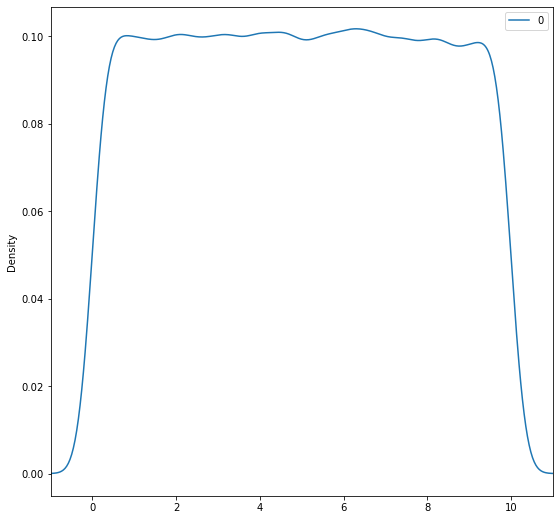

In [21]:
pd.DataFrame(uniform_data).plot(kind='density', #Строим график - плотность распределения
                               figsize=(9,9),
                               xlim=(-1,11))

In [22]:
#Интегральная (кумулятивная) функция распределения - cumulatuve distribution function (cdf). Позволяет понять, какова вероятность,
#что определенное значение оказывается ниже определенного показателя. Например, мы хотим понять, какова вероятность того, что значение будет
#в отрезке от  0 до 2.5. Мы можем выяснить это следующим образом:
stats.uniform.cdf(x=2.5,   #Нужный квантиль или иное значение
                 loc=0,    #Стартовая точка распределения
                 scale=10) #Конечная точка распределения

0.25

In [ ]:
#То есть, у нас 25% вероятность, что значение попадёт в область распределения ниже 2.5

In [24]:
#ppf (percent point function) - также обратная кумулятивная функция представляет собой обратный случай по отношению к cdf
#Если cdf возвращает вероятности того, что меньше или равно некоторому значению, то ppf действует наоборот - мы можем с её помощью узнать значение,
#для которого есть 40%-й шанс, что мы увидим ожидаемые величины в его пределах
stats.uniform.ppf(q=0.4,
                 loc=0,
                 scale=10)

4.0

In [ ]:
#Возвращает 4.0

In [25]:
#pdf - это плотность распределения вероятностей (то есть, высота распределения). 
#При равномерном распределении мы получим одинаковые значения, т.к. верх функции у нас плоский, что видно на рисунке.
#Для величины за пределами функции мы получим 0
for x in range(-1,12,3):
    print("Density at x-value:", str(x))
    print(stats.uniform.pdf(x, loc=0, scale=10))

Density at x-value: -1
0.0
Density at x-value: 2
0.1
Density at x-value: 5
0.1
Density at x-value: 8
0.1
Density at x-value: 11
0.0


### Нормальное распределение

In [27]:
prob_under_minus1 = stats.norm.cdf(x=-1,
                                  loc=0,
                                  scale=1)

prob_over_1 = 1 - stats.norm.cdf(x=1,
                                  loc=0,
                                  scale=1)

between_prob = 1- (prob_under_minus1 + prob_over_1)

print(prob_under_minus1, prob_over_1, between_prob)

0.15865525393145707 0.15865525393145707 0.6826894921370859


In [28]:
print(stats.norm.ppf(q=0.025)) #Так мы можем найти пограничное значение для квантиля в 2,5%
print(stats.norm.ppf(q=0.975)) #А так - для квантиля в 97,5%

-1.9599639845400545
1.959963984540054


In [29]:
#значения близки к 2, то есть, большинство данных лежит в пределах 2 среднеквадратичных отклонений. Это - типичная картина для нормального распределения

In [30]:
print(stats.norm.cdf(x=-3)) #какое количество данных ниже 3 среднеквадратичных отклонений
print(stats.norm.cdf(x=3)) #какое количество данных выше 3 среднеквадратичных отклонений

0.0013498980316300933
0.9986501019683699


In [31]:
# подтвердили, что данные укладываются в пределы 2 среднеквадратичных отклонений, что типично для нормального распределения

### Биномиальное распределение

col_0   0    1    2     3     4     5     6     7    8   9   10
row_0                                                          
counts   8  115  473  1199  2024  2431  2052  1148  453  90   7


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

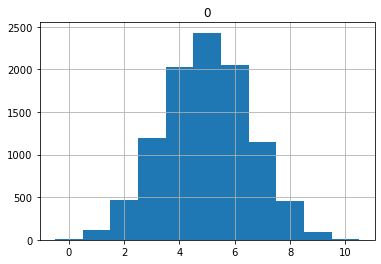

In [32]:
#В отличие от предыдущих примеров биномиальное распределение - это дискретная величина. Обычно она обозначает возможные исходы какого-то количества экспериментов или событий
#Данное распределение говорит, насколько вероятно достичь определенное количество успехов при энном количестве попыток.
#Пример - мы хотим бросить монетку 10 раз и сделать это 10000 раз
fair_coin_flips = stats.binom.rvs(n=10, #число бросков за попытку
                                 p=0.5, #вероятность успеха
                                 size=10000) #кол-во попыток

print(pd.crosstab(index="counts", columns=fair_coin_flips))
pd.DataFrame(fair_coin_flips).hist(range=(-0.5, 10.5), bins=11)

In [ ]:
#то есть, скорее всего, желаемая сторона монетки выпадет от 4 до 6 раз

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts   8  50  281  923  1962  3019  2663  1094


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

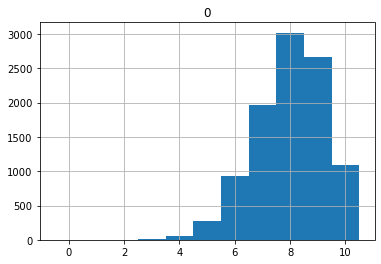

In [35]:
#А теперь поменяем вероятность успеха
biased_coin_flips = stats.binom.rvs(n=10, #число бросков за попытку
                                 p=0.8, #вероятность успеха
                                 size=10000) #кол-во попыток

print(pd.crosstab(index="counts", columns=biased_coin_flips))
pd.DataFrame(biased_coin_flips).hist(range=(-0.5, 10.5), bins=11)

In [38]:
#Используем cdf для того, чтобы понять вероятность определенного количества успехов при заданном количестве попыток и вероятности успеха
stats.binom.cdf(k=5, #Вероятность, что мы достигнем успеха 5 раз или менее
                  n=10, #Сделав 10 попыток
                  p=0.8) #При условии, что вероятность успеха каждой попытки - 80%

0.032793497599999964

In [ ]:
#Вероятность - 3%

In [39]:
1 - stats.binom.cdf(k=8, #Так мы получим вероятность 9 успехов или более
                  n=10, 
                  p=0.8) 

0.37580963840000003

In [40]:
#Для дискретных величин, таких как при биномиальном распредении, мы используем не ppf, а pmf (probability mass function, функция распределения масс)
stats.binom.pmf(k=5, #вероятность пяти успехов при 10 попытках с 50%-й вероятностью успеха
               n=10,
               p=0.5)

0.24609375000000025

In [41]:
stats.binom.pmf(k=8, 
               n=10,
               p=0.8)

0.301989888

### Геометрическое и экспоненциальное распределение

col_0     1     2     3    4    5    6   7   8   9   10  11  12  13  14  15  \
row_0                                                                         
counts  4946  2508  1281  635  304  141  90  44  28   6   7   5   1   2   1   

col_0   18  
row_0       
counts   1  


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

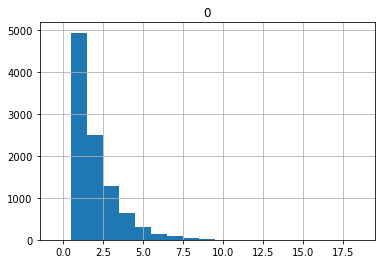

In [43]:
#Такое распределение служит для измерения времени, за которое должно произойти событие.
#Геометрическое распределение - дискретная величина, которая моделирует количество попыток, необходимых для достижения успеха при заданной вероятности успеха
#Экспоненциальное распределение - это её аналог, моделирующий количество времени, которое уйдет до наступления события при заданной вероятности его наступления
flips_till_heads = stats.geom.rvs(size=10000, #Генерируем данные
                                 p=0.5) #Вероятность, что мы получим решку при броске монетки
print(pd.crosstab(index="counts", columns=flips_till_heads))
pd.DataFrame(flips_till_heads).hist(range=(-0.5, max(flips_till_heads) + 0.5), bins=max(flips_till_heads)+1)

In [44]:
#Т.е. часто, для того, чтобы получить решку, достаточно одной попытки, что логично
first_five = stats.geom.cdf(k=5, #А так мы можем померять вероятность успеха при первых пяти попытках
                           p=0.5)
1-first_five #А так мы посчитаем вероятность того, что нам потребуется БОЛЕЕ 5 попыток, чтобы достичь успеха

0.03125

In [ ]:
#Получили всего 3%

In [45]:
#Мы можем применить pmf, например, чтобы понять, какова вероятность, что нам понадобится сделать точно 2 броска, чтобы получить решку
stats.geom.pmf(k=2,
              p=0.5)

0.25

### Пуассоново распределение

col_0      0     1     2    3    4   5  6  7  9
row_0                                          
counts  3679  3630  1859  632  152  39  7  1  1


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

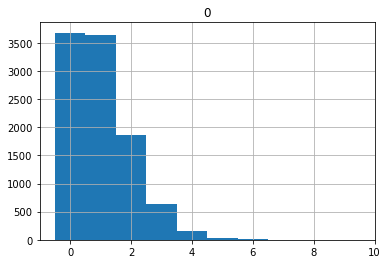

In [48]:
#вероятностное распределение дискретного типа, моделирует случайную величину, представляющую собой число событий, произошедших за фиксированное время, при условии, что данные события происходят с некоторой фиксированной средней интенсивностью и независимо друг от друга.
import random
random.seed(12)
arrival_rate_1 = stats.poisson.rvs(size=10000, #Генерируем данные
                                  mu=1) #Среднее время прибытия за 1 час
print(pd.crosstab(index="counts", columns=arrival_rate_1))
pd.DataFrame(arrival_rate_1).hist(range=(-0.5, max(arrival_rate_1) + 0.5), bins=max(arrival_rate_1)+1)

In [ ]:
#То есть, как правило, мы видим одно прибытие за час, но часто случается и два прибытия. 3 и более - уже реже
#Но вполне может быть такое, что за час никто не прибудет - 0 прибытий.

col_0   0   1   2   3    4    5    6    7     8     9   ...   15   16   17  \
row_0                                                   ...                  
counts   1  11  21  84  169  368  628  903  1130  1244  ...  350  221  138   

col_0   18  19  20  21  22  23  24  
row_0                               
counts  66  40  11  11   4   1   1  

[1 rows x 25 columns]


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

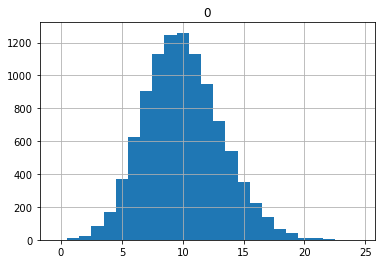

In [49]:
random.seed(12)
arrival_rate_10 = stats.poisson.rvs(size=10000, #Генерируем данные
                                  mu=10) #А теперь поменяем на 10 прибытий в час
print(pd.crosstab(index="counts", columns=arrival_rate_10))
pd.DataFrame(arrival_rate_10).hist(range=(-0.5, max(arrival_rate_10) + 0.5), bins=max(arrival_rate_10)+1)

In [ ]:
#Теперь уже мы видим, что кейс, когда за час никто не прибудет, весьма маловероятен. Зато есть вероятность увидеть даже 20 прибытий за час.